In [1]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [12]:
def copy_file(src_path, dest_path):
    with open(src_path, 'rb') as src_file:
        with open(dest_path, 'wb') as dest_file:
            dest_file.write(src_file.read())

# Specify the local file paths
source_path = r"C:\Users\Nafis Ansari\Desktop\IBM Data science Labs\Projects to practice\Analyzing the impact of recession on automobile sales\historical_automobile_sales.csv"
destination_path = "historical_automobile_sales.csv"  # You can change this to the desired destination path

# Call the copy_file function with the specified parameters
copy_file(source_path, destination_path)


In [14]:
import pandas as pd
df=pd.read_csv(destination_path)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [15]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [16]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


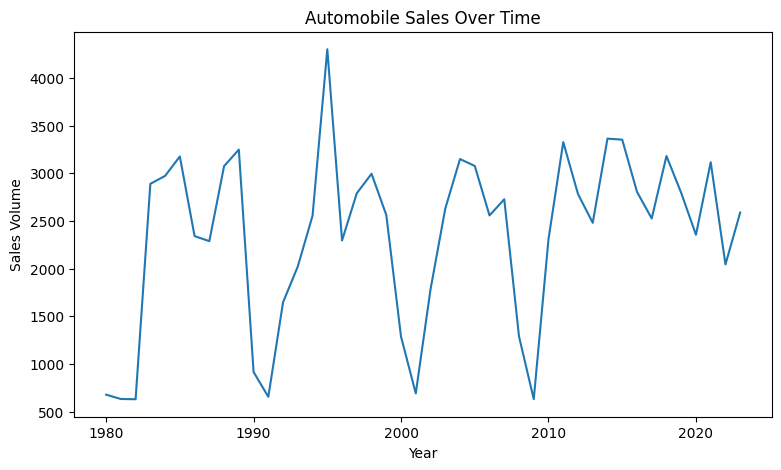

In [22]:
df_line=df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(9,5))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


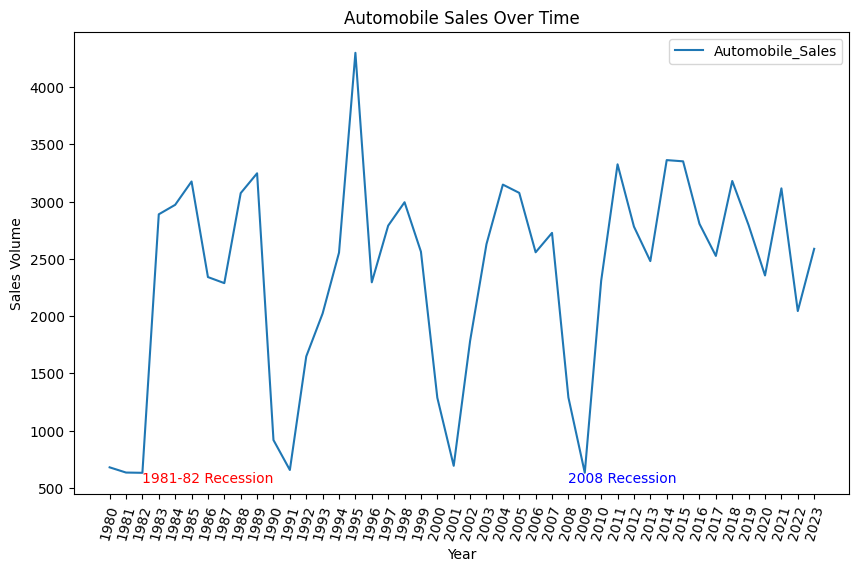

In [30]:
plt.figure(figsize=(10,6))
df_line=df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.text(1982,550,'1981-82 Recession', fontsize=10, color='red')
plt.text(2008,550,'2008 Recession', fontsize=10, color='blue')
plt.legend()
plt.show()






---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to see if there is a noticeable difference in sales trends between different vehicle types during recession periods?


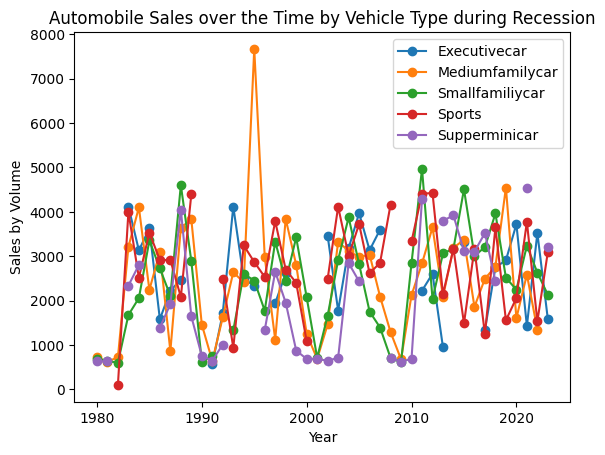

In [56]:
df_Mline=df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
# df_Mline.set_index('Year', inplace=True)
pivoted_data=df_Mline.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')
pivoted_data.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Sales by Volume')
plt.title('Automobile Sales over the Time by Vehicle Type during Recession')
plt.legend()
plt.show()

#### From the above plot we observed that during recession the sales of Sports car declined due to it's high cost and the sales of Medium Famoly Car as Suoer Mini car increased 

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


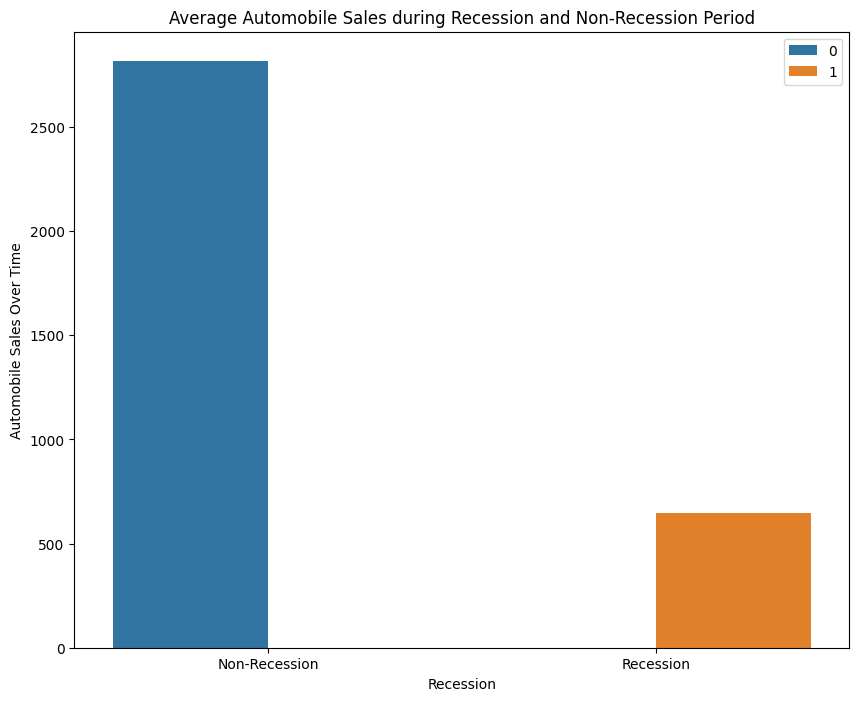

In [60]:
rec_df=df.groupby(df['Recession'])['Automobile_Sales'].mean().reset_index()

# create a barplot using seaborn
plt.figure(figsize=(10,8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=rec_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales Over Time')
plt.title('Average Automobile Sales during Recession and Non-Recession Period')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.legend()
plt.show()


### Let us compare the sales of different vehicle types during a recession and a non-recession period


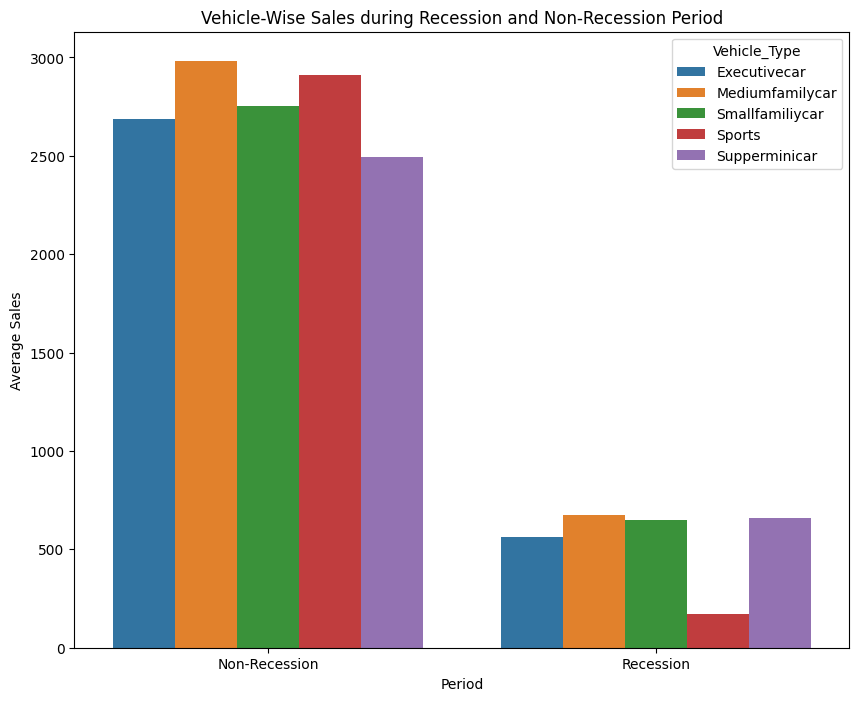

In [67]:
# Filter the data for recessionary periods
rec_data=df[df['Recession']==1]

grouped_data=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
# Calculate the total sales volume by vehicle type during recessions
sales_by_vehicle_type = rec_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10,8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_data)
plt.xticks(ticks=[0,1], labels=['Non-Recession','Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()





### From the above plot we can observe that the Sales were much higher during Non resession period as compared to the recession period. The most affected type of Vehicle are sports and executive car


---


### TASK 1.4: Sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


#### How did the GDP vary over time during recession and non-recession periods? 



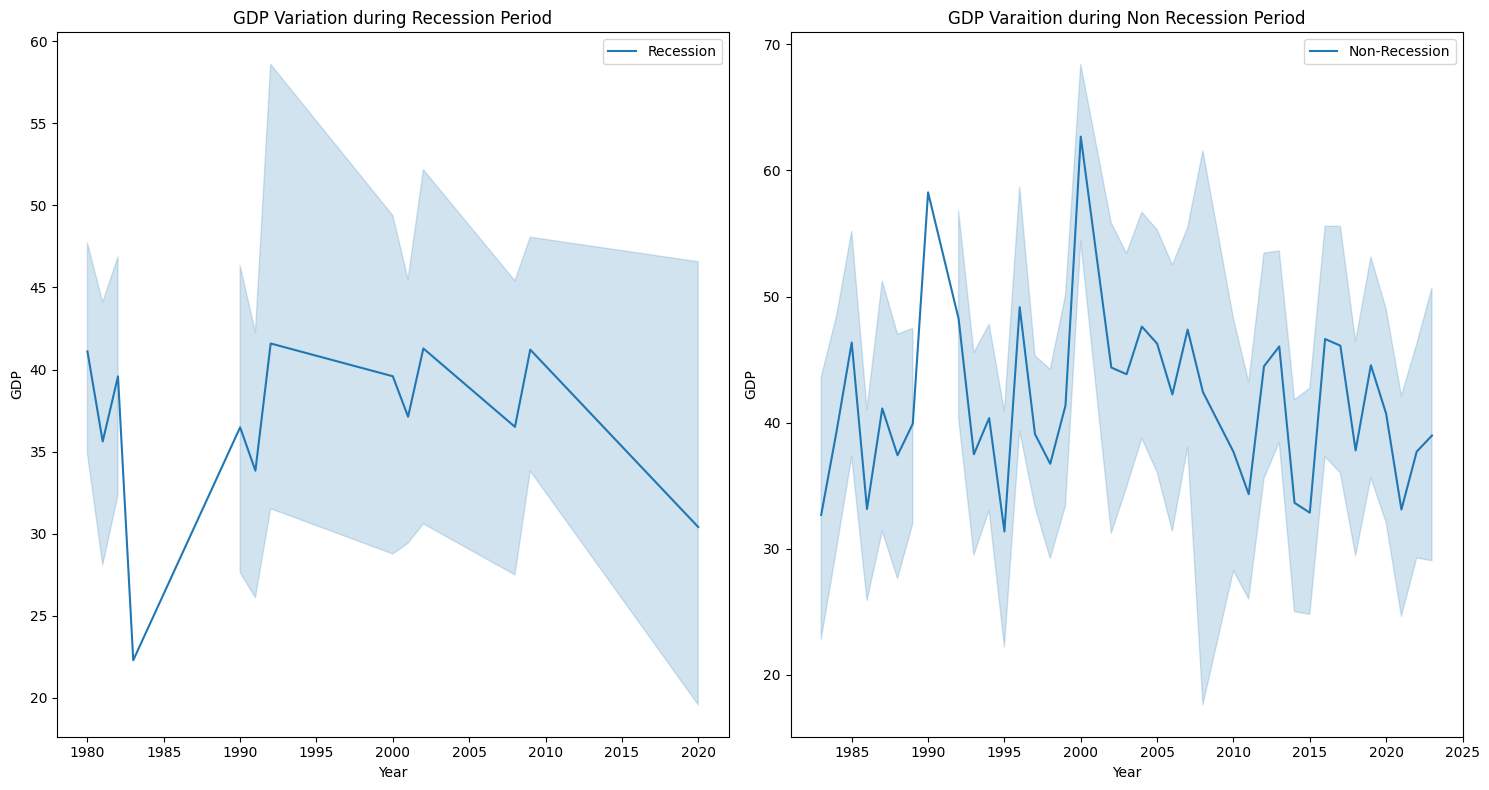

In [72]:
#Create dataframes for recession and non-recession period
rec_data=df[df['Recession']==1]
non_rec_data=df[df['Recession']==0]

fig=plt.figure(figsize=(15,8))
#Create different axes for subploting
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
#plt.subplot(1, 1, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Varaition during Non Recession Period')
plt.tight_layout()
plt.show()



#### From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>




---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


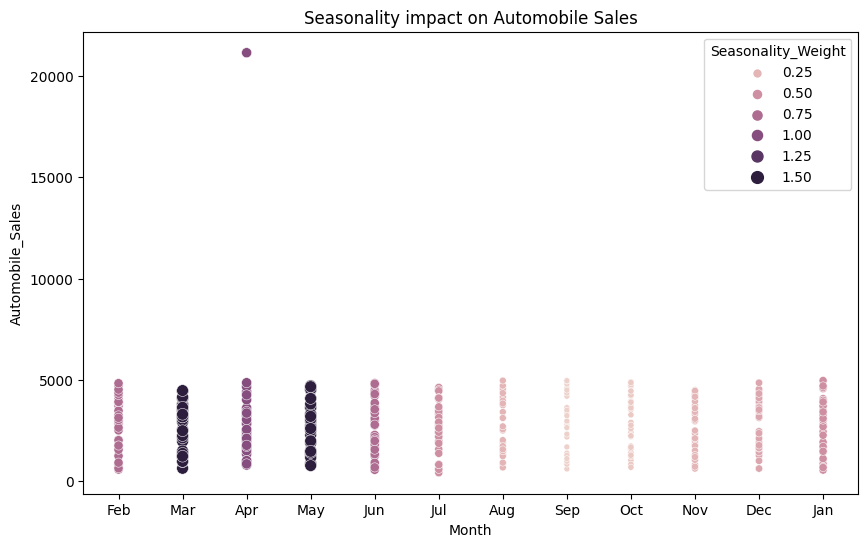

In [80]:
plt.figure(figsize=(10,6))
non_rec_data=df[df['Recession']==0]
size=non_rec_data['Seasonality_Weight'] #for Bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', size=size)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()





####  From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>



---


 ### TASK 1.6: Develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


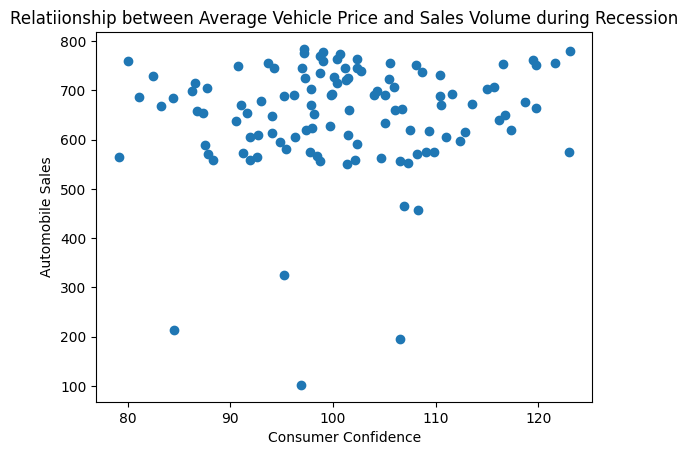

In [87]:
rec_data=df[df['Recession']==1]
plt.scatter(data=rec_data, x='Consumer_Confidence', y='Automobile_Sales')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Relatiionship between Average Vehicle Price and Sales Volume during Recession')
plt.show()




 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


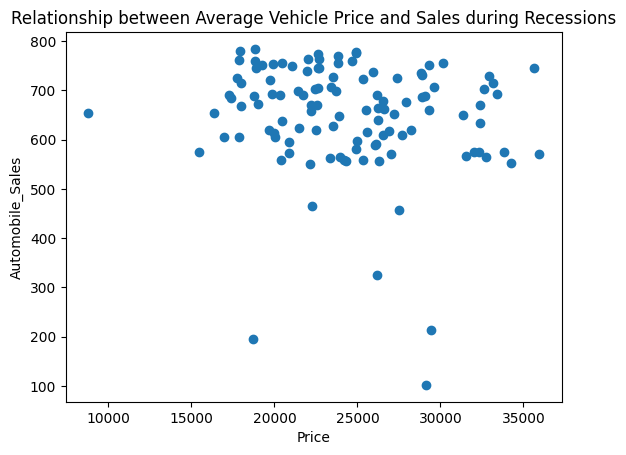

In [92]:
rec_data=df[df['Recession']==1]
plt.scatter(recession_df['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()


### There is not much relation!<br><br>


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


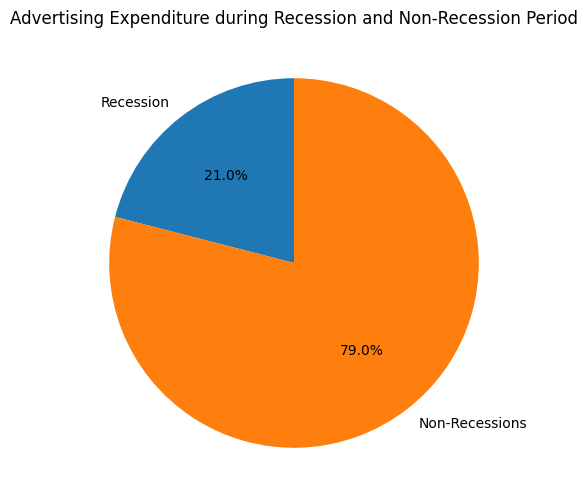

In [93]:
# create two dataframes
Rdata=df[df['Recession']==1]
NRdata=df[df['Recession']==0]

# calculate the sum of advertising expenditure
Rtotal=Rdata['Advertising_Expenditure'].sum()
NRtotal=NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8,6))
labels=['Recession','Non-Recessions']
sizes=[Rtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Period')
plt.show()

#### It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total sales during recessions? 



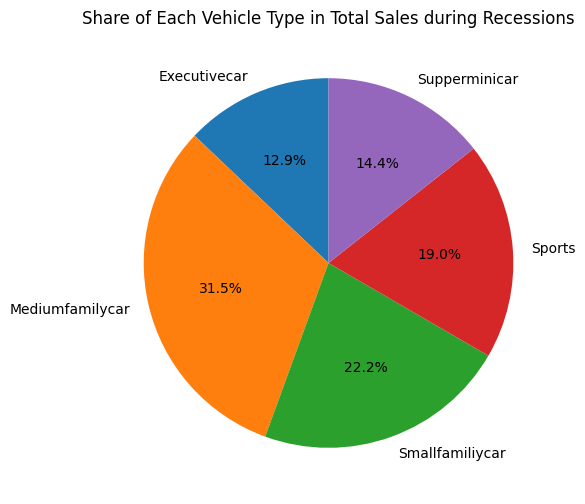

In [96]:
 # Filter the data
Rdata=df[df['Recession']==1]

# Calculate the sales volume by vehicle type during recessions
VTsales=df.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8,6))

labels=VTsales.index
sizes=VTsales.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()


### During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>



----


 ### TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period. Title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


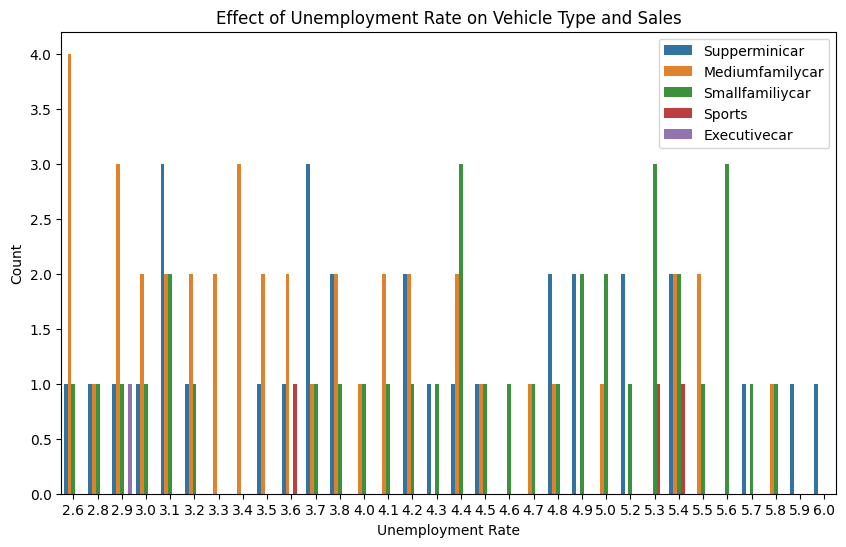

In [98]:
recc_data=df[df['Recession']==1]
plt.figure(figsize=(10, 6))

sns.countplot(data=recc_data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend()
plt.show()



#### During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [101]:
filename='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
df1=pd.read_json(filename)
df1.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': 'AL', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': 'AK', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': 'AZ', 'properties': ..."
3,FeatureCollection,"{'type': 'Feature', 'id': 'AR', 'properties': ..."
4,FeatureCollection,"{'type': 'Feature', 'id': 'CA', 'properties': ..."


#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [4]:
# Filter the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

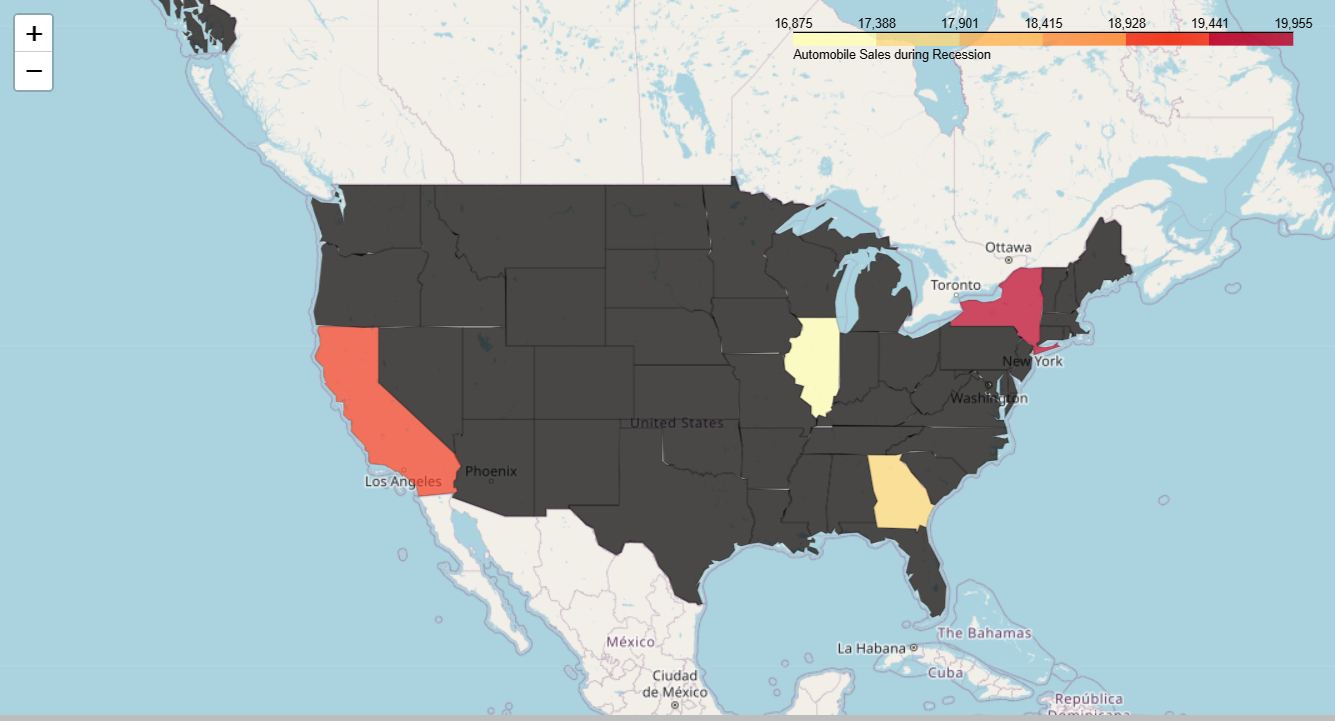